In [1]:
#Description: StockMarket Clustering with K-means using Python

In [79]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')

In [80]:
df = pd.read_excel('2000_2021_close.xlsx')

In [112]:
df.drop(['Code'], axis=1, inplace=True)

KeyError: "['Code'] not found in axis"

In [82]:
#Calculate the annual mean returns and variances
daily_returns = df.pct_change()
annual_mean_returns = daily_returns.mean()*252
annual_return_variance = daily_returns.var()*252

In [13]:
daily_returns.mean()

A000020    0.000769
A000040    0.000273
A000050    0.000767
A000060    0.001125
A000070    0.000751
             ...   
A700002    0.000321
A700003   -0.000580
A700004   -0.004490
A900140    0.000262
A950210    0.000376
Length: 1549, dtype: float64

In [146]:
#Create a new Dataframe
df2 = pd.DataFrame(df.columns, columns=['Stock_Symbols'])
df2['Variances'] = annual_return_variance.values
df2['Returns'] = annual_mean_returns.values
#Show the data
df2 = df2.dropna()

k:  2    cost :  5046.00949693419
k:  3    cost :  667.2931826747454
k:  4    cost :  385.9276915901072
k:  5    cost :  233.5392016930574
k:  6    cost :  148.57247917818188
k:  7    cost :  114.74923610989268
k:  8    cost :  88.44081034328161
k:  9    cost :  67.89891501211001
k:  10    cost :  57.595019936375564
k:  11    cost :  49.59045427469249
k:  12    cost :  42.95926450567027
k:  13    cost :  37.02406127183663
k:  14    cost :  33.46854930546534
k:  15    cost :  29.93883359547109


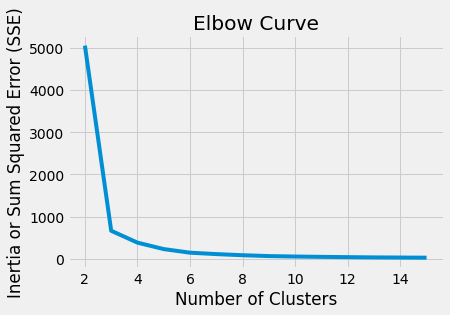

In [148]:
#k 정하기 Use the Elbow method to determine the number of clusters to use to group the stocks
#Get and store annual returns and annual variances
X = df2[['Returns', 'Variances']].values

inertia_list = []
for k in range(2, 16):
    #Create and train the model
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    print('k: ', k, '  ', 'cost : ', inertia)
    
    inertia_list.append(kmeans.inertia_)

    
#plot the data
plt.plot(range(2,16), inertia_list)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia or Sum Squared Error (SSE)')
plt.show()

In [149]:
#Get and show the labels / groups
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [151]:
df2['Cluster_Labels'] = labels   

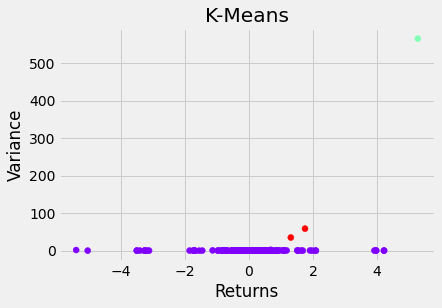

In [152]:
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap='rainbow')
plt.title('K-Means')
plt.xlabel('Returns')
plt.ylabel('Variance')
plt.show()

In [157]:
#Create a function to build a simple diversed portfolio
def diversed_port():
    for i in range(0,4):
        symbol = df2[ df2['Cluster_Labels'] == i].head(1)
        print(symbol[['Stock_Symbols', 'Cluster_Labels']])

In [158]:
diversed_port()

  Stock_Symbols  Cluster_Labels
0       A000020               0
    Stock_Symbols  Cluster_Labels
394       A013890               1
  Stock_Symbols  Cluster_Labels
5       A000080               2
Empty DataFrame
Columns: [Stock_Symbols, Cluster_Labels]
Index: []
